### .mat -> .npy

In [1]:
import os
import numpy as np
import matplotlib.pylab as plt
import scipy.io

mat_dir_path = os.path.join(os.getcwd(), 'DEAP','data_preprocessed_matlab')
mat_file_list = os.listdir(mat_dir_path)
print(mat_file_list)

['s01.mat', 's02.mat', 's03.mat', 's04.mat', 's05.mat', 's06.mat', 's07.mat', 's08.mat', 's09.mat', 's10.mat', 's11.mat', 's12.mat', 's13.mat', 's14.mat', 's15.mat', 's16.mat', 's17.mat', 's18.mat', 's19.mat', 's20.mat', 's21.mat', 's22.mat', 's23.mat', 's24.mat', 's25.mat', 's26.mat', 's27.mat', 's28.mat', 's29.mat', 's30.mat', 's31.mat', 's32.mat']


In [21]:
# mat_data = []
# # mat_target = []
# for name in mat_file_list:
#     print(name)
#     file = scipy.io.loadmat(mat_dir_path +"/"+ name)
#     tmp_data = np.delete(file['data'],[32,33,34,35,36,37,38,39], axis = 1)
# #     print(tmp_data.shape)
#     mat_data.extend(tmp_data)
# #     mat_target.extend(file['labels'])
# #     print(tmp_data.shape)
# #     print(file['labels'].shape)
    
# mat_data = np.array(mat_data)
# # mat_target = np.array(mat_target)
# print(mat_data.shape)
# # print(mat_target.shape)

# #저장
# np.save(os.path.join(os.getcwd(),'DEAP','DEAP_data_eeg'), mat_data)
# # np.save(os.path.join(os.getcwd(),'DEAP','DEAP_label'), mat_target)

s01.mat
s02.mat
s03.mat
s04.mat
s05.mat
s06.mat
s07.mat
s08.mat
s09.mat
s10.mat
s11.mat
s12.mat
s13.mat
s14.mat
s15.mat
s16.mat
s17.mat
s18.mat
s19.mat
s20.mat
s21.mat
s22.mat
s23.mat
s24.mat
s25.mat
s26.mat
s27.mat
s28.mat
s29.mat
s30.mat
s31.mat
s32.mat
(1280, 32, 8064)


## data load

In [2]:
data = np.load('DEAP/DEAP_data.npy')
label = np.load('DEAP/DEAP_label.npy')
label = label[:,:2] # valence, arousal
val, aro = label[:,0], label[:,1]

print('data shape :', data.shape)
print('label shape :', label.shape)
print('val shape :', val.shape)
print('aro shape :', aro.shape)

data shape : (1280, 40, 8064)
label shape : (1280, 2)
val shape : (1280,)
aro shape : (1280,)


In [3]:
# only eeg chennel data
data_eeg = np.load('DEAP/DEAP_data_eeg.npy')
print('data_eeg shape :', data_eeg.shape)

data_eeg shape : (1280, 32, 8064)


<tbody><tr><th>Array name</th><th>Array shape</th><th>Array contents</th></tr>
       <tr><td>data</td><td>40 x 40 x 8064</td><td>video/trial x channel x data</td></tr>
       <tr><td>labels</td><td>40 x 4</td><td>video/trial x label (valence, arousal, dominance, liking)</td></tr>
</tbody>

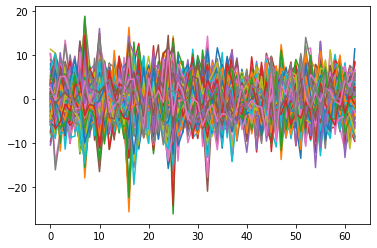

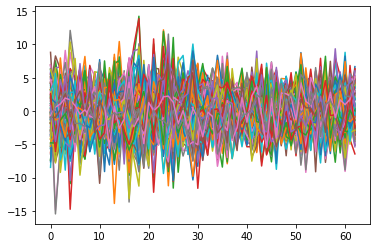

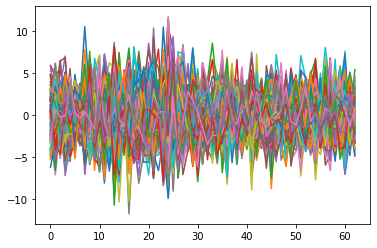

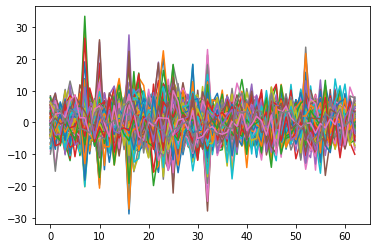

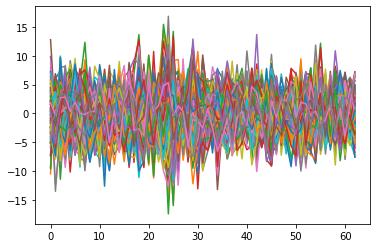

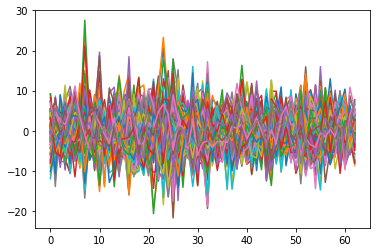

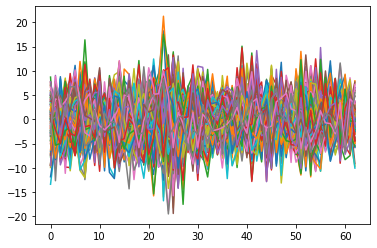

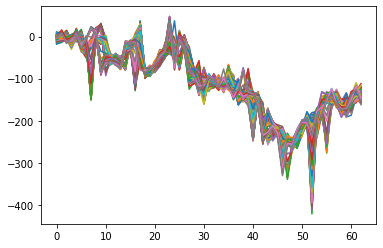

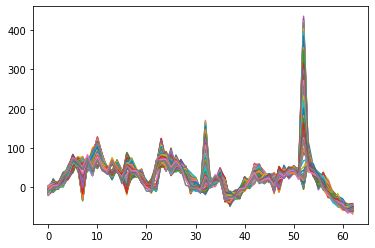

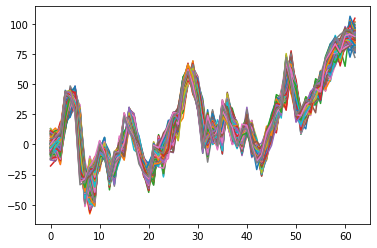

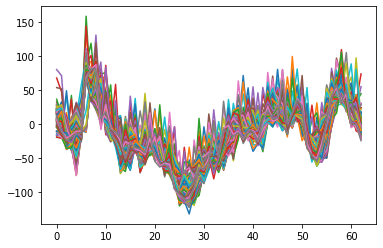

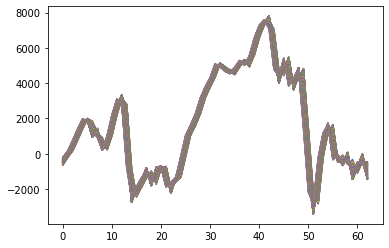

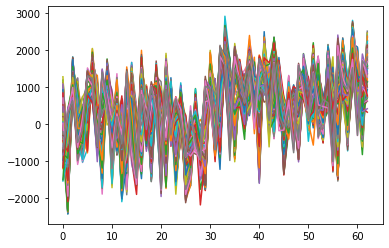

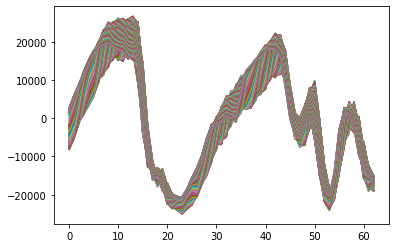

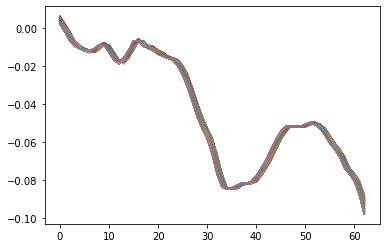

In [9]:
data_num = 0
channel_range = np.arange(40)
for channel in channel_range[25:]:
    sam = data[data_num][channel].reshape(63,-1) #0번째 데이터의 0번째 채널
    plt.plot(sam) #63초 동안 찍힌 것(1초에 128개씩)
#     plt.ylim([data_eeg_min, data_eeg_max])
    plt.show()

In [4]:
import mne
sfreq = 128
alpha_fir = mne.filter.filter_data(data_eeg, sfreq, 8, 13, method='fir')
beta_fir = mne.filter.filter_data(data_eeg, sfreq, 13, 30, method='fir')
print(alpha_fir.shape)

Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 213 samples (1.664 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 40960 out of 40960 | elapsed:   12.3s finished


Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 131 samples (1.023 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 40960 out of 40960 | elapsed:   23.3s finished


(1280, 32, 8064)


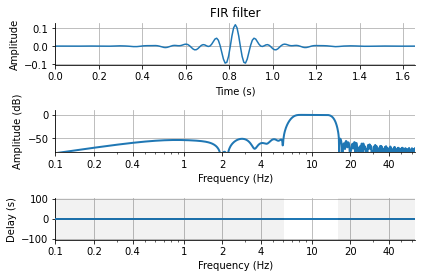

Figure(432x288)


In [6]:
print(mne.viz.plot_filter(alpha_filter_params, sfreq))

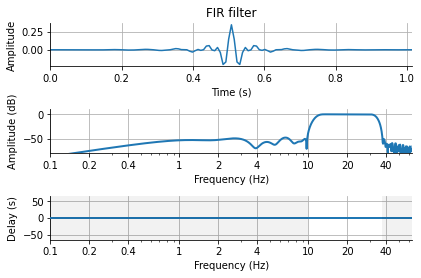

Figure(432x288)


In [7]:
print(mne.viz.plot_filter(beta_filter_params, sfreq))

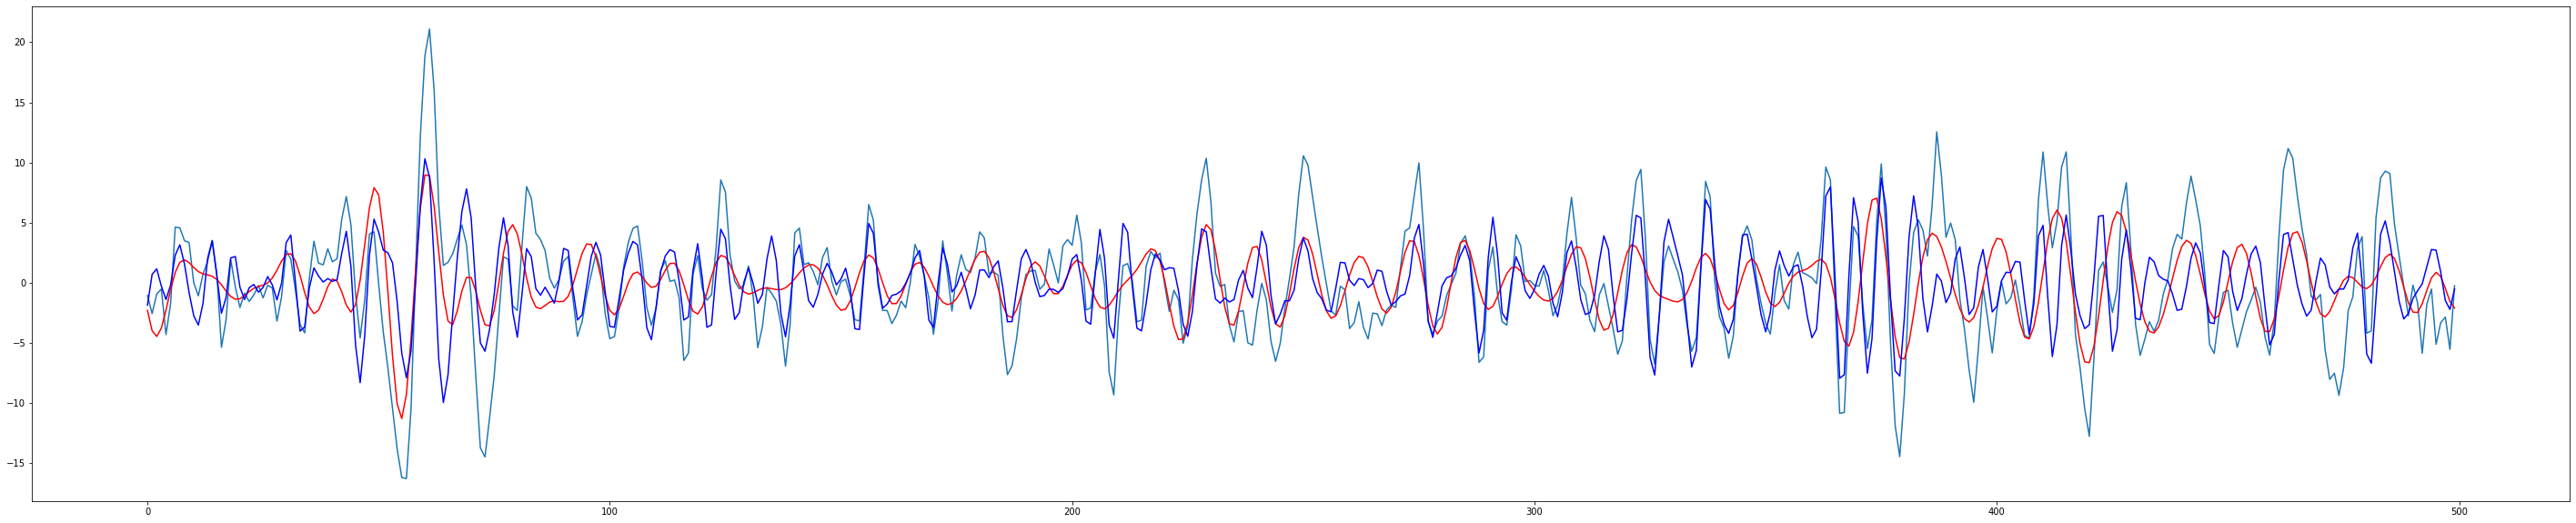

In [27]:
where = 1
channel = 2
plt.figure(figsize=(50,10))
plt.plot(data_eeg[where, channel, 5000:5500])
plt.plot(alpha_fir[where, channel, 5000:5500], c='r')
plt.plot(beta_fir[where, channel, 5000:5500], c='b')
plt.show()

In [5]:
alpha_mean = np.mean(alpha_fir, axis=2)
beta_mean = np.mean(beta_fir, axis=2)
print(alpha_mean.shape, beta_mean.shape)

(1280, 32) (1280, 32)


[<matplotlib.lines.Line2D object at 0x0000024F4D6BB808>, <matplotlib.lines.Line2D object at 0x0000024F4D6B0F48>, <matplotlib.lines.Line2D object at 0x0000024F4D6DDB88>, <matplotlib.lines.Line2D object at 0x0000024F4D6DDD88>, <matplotlib.lines.Line2D object at 0x0000024F4D6DDFC8>, <matplotlib.lines.Line2D object at 0x0000024F4D6EA248>, <matplotlib.lines.Line2D object at 0x0000024F4D6EA448>, <matplotlib.lines.Line2D object at 0x0000024F4D6EA648>, <matplotlib.lines.Line2D object at 0x0000024F4D6DDF88>, <matplotlib.lines.Line2D object at 0x0000024F4D6EA208>, <matplotlib.lines.Line2D object at 0x0000024F4D6BB688>, <matplotlib.lines.Line2D object at 0x0000024F4D6EAD88>, <matplotlib.lines.Line2D object at 0x0000024F4D6EAF88>, <matplotlib.lines.Line2D object at 0x0000024EFFA931C8>, <matplotlib.lines.Line2D object at 0x0000024EFFA933C8>, <matplotlib.lines.Line2D object at 0x0000024EFFA935C8>, <matplotlib.lines.Line2D object at 0x0000024EFFA937C8>, <matplotlib.lines.Line2D object at 0x0000024EFF

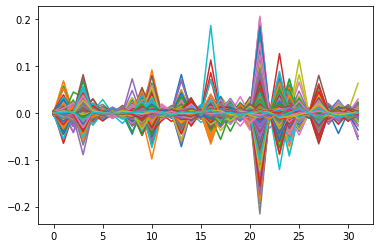

In [6]:
print(plt.plot(alpha_mean.reshape(32,-1)))

[<matplotlib.lines.Line2D object at 0x0000024FEF6AEE08>, <matplotlib.lines.Line2D object at 0x0000024FEF6AE148>, <matplotlib.lines.Line2D object at 0x0000024FEF6BF488>, <matplotlib.lines.Line2D object at 0x0000024FEF6A6708>, <matplotlib.lines.Line2D object at 0x0000024FEF6BF748>, <matplotlib.lines.Line2D object at 0x0000024FEF6BF988>, <matplotlib.lines.Line2D object at 0x0000024FEF6BFB88>, <matplotlib.lines.Line2D object at 0x0000024FEF6BFD88>, <matplotlib.lines.Line2D object at 0x0000024FEF6BF708>, <matplotlib.lines.Line2D object at 0x0000024FEF6BF948>, <matplotlib.lines.Line2D object at 0x0000024FEF6A6D48>, <matplotlib.lines.Line2D object at 0x0000024FEF644388>, <matplotlib.lines.Line2D object at 0x0000024FEF644588>, <matplotlib.lines.Line2D object at 0x0000024FEF644788>, <matplotlib.lines.Line2D object at 0x0000024FEF644988>, <matplotlib.lines.Line2D object at 0x0000024FEF644B88>, <matplotlib.lines.Line2D object at 0x0000024FEF644D88>, <matplotlib.lines.Line2D object at 0x0000024FEF

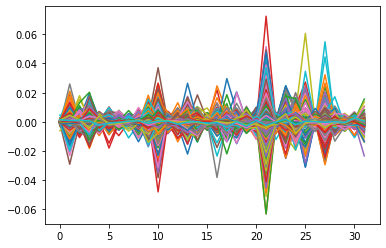

In [7]:
print(plt.plot(beta_mean.reshape(32,-1)))

val

In [35]:
bins = 40
labels = aro
value_lst, bins_edges = np.histogram(labels, bins=bins, range=(1, 10))

def get_bin_idx(label):
    if label == 9:
        return bins - 1
    else:
        return np.where(bins_edges > label)[0][0] - 1

alpha_result = np.empty(shape=(1, 32), dtype=np.float64)
beta_result = np.empty(shape=(1, 32), dtype=np.float64)
label_count = np.empty(shape=(1,), dtype=np.int32)

for idx in range(0, bins):
    where = [get_bin_idx(val) == idx for val in labels]
    alpha_dat = alpha_mean[where]
    beta_dat = beta_mean[where]
    alpha_result = np.append(alpha_result, np.mean(alpha_dat, axis=0).reshape(1,32), axis=0)
    beta_result = np.append(beta_result, np.mean(beta_dat, axis=0).reshape(1,32), axis=0)
    label_count = np.append(label_count, len(alpha_dat))
alpha_result = alpha_result[1:]
beta_result = beta_result[1:]
label_count = label_count[1:]
print(alpha_result.shape, beta_result.shape)

(40, 32) (40, 32)


<BarContainer object of 40 artists>

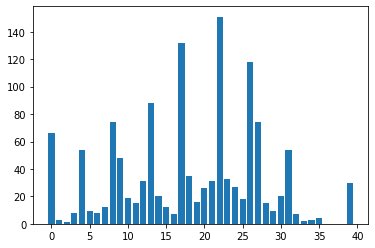

In [36]:
plt.bar(range(bins), label_count)

<BarContainer object of 32 artists>

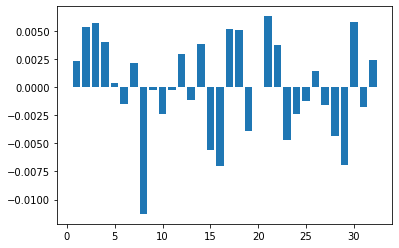

In [37]:
plt.bar(range(1,33), alpha_result[2, :])

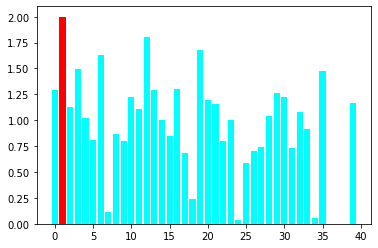

In [38]:
def cos_sim(A, B):
  return np.dot(A, B)/(np.linalg.norm(A)*np.linalg.norm(B))
#val, alpha
anchor = 1
graph = []
for i in range(bins):
    graph.append(cos_sim(alpha_result[anchor], alpha_result[i])+1)
b = np.arange(bins)
c = np.where(b == anchor, 'r', 'aqua')
plt.bar(range(bins), graph, color=c)
plt.show()

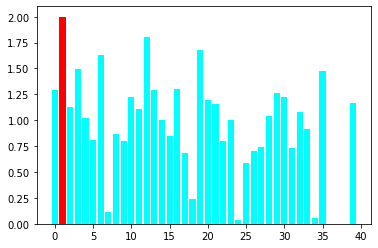

In [39]:
#aro, alpha
anchor = 1
graph = []
for i in range(bins):
    graph.append(cos_sim(alpha_result[anchor], alpha_result[i])+1)
b = np.arange(bins)
c = np.where(b == anchor, 'r', 'aqua')
plt.bar(range(bins), graph, color=c)
plt.show()

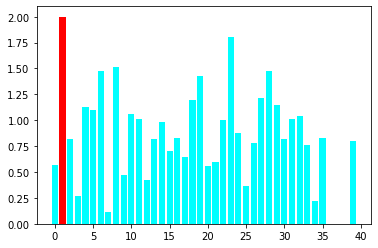

In [40]:
#val, beta
anchor = 1
graph = []
for i in range(bins):
    graph.append(cos_sim(beta_result[anchor], beta_result[i])+1)
b = np.arange(bins)
c = np.where(b == anchor, 'r', 'aqua')
plt.bar(range(bins), graph, color=c)
plt.show()

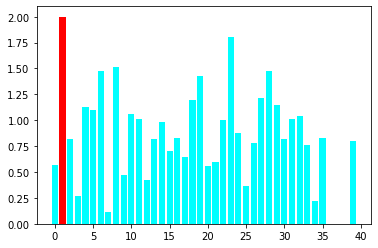

In [41]:
#aro, beta
anchor = 1
graph = []
for i in range(bins):
    graph.append(cos_sim(beta_result[anchor], beta_result[i])+1)
b = np.arange(bins)
c = np.where(b == anchor, 'r', 'aqua')
plt.bar(range(bins), graph, color=c)
plt.show()

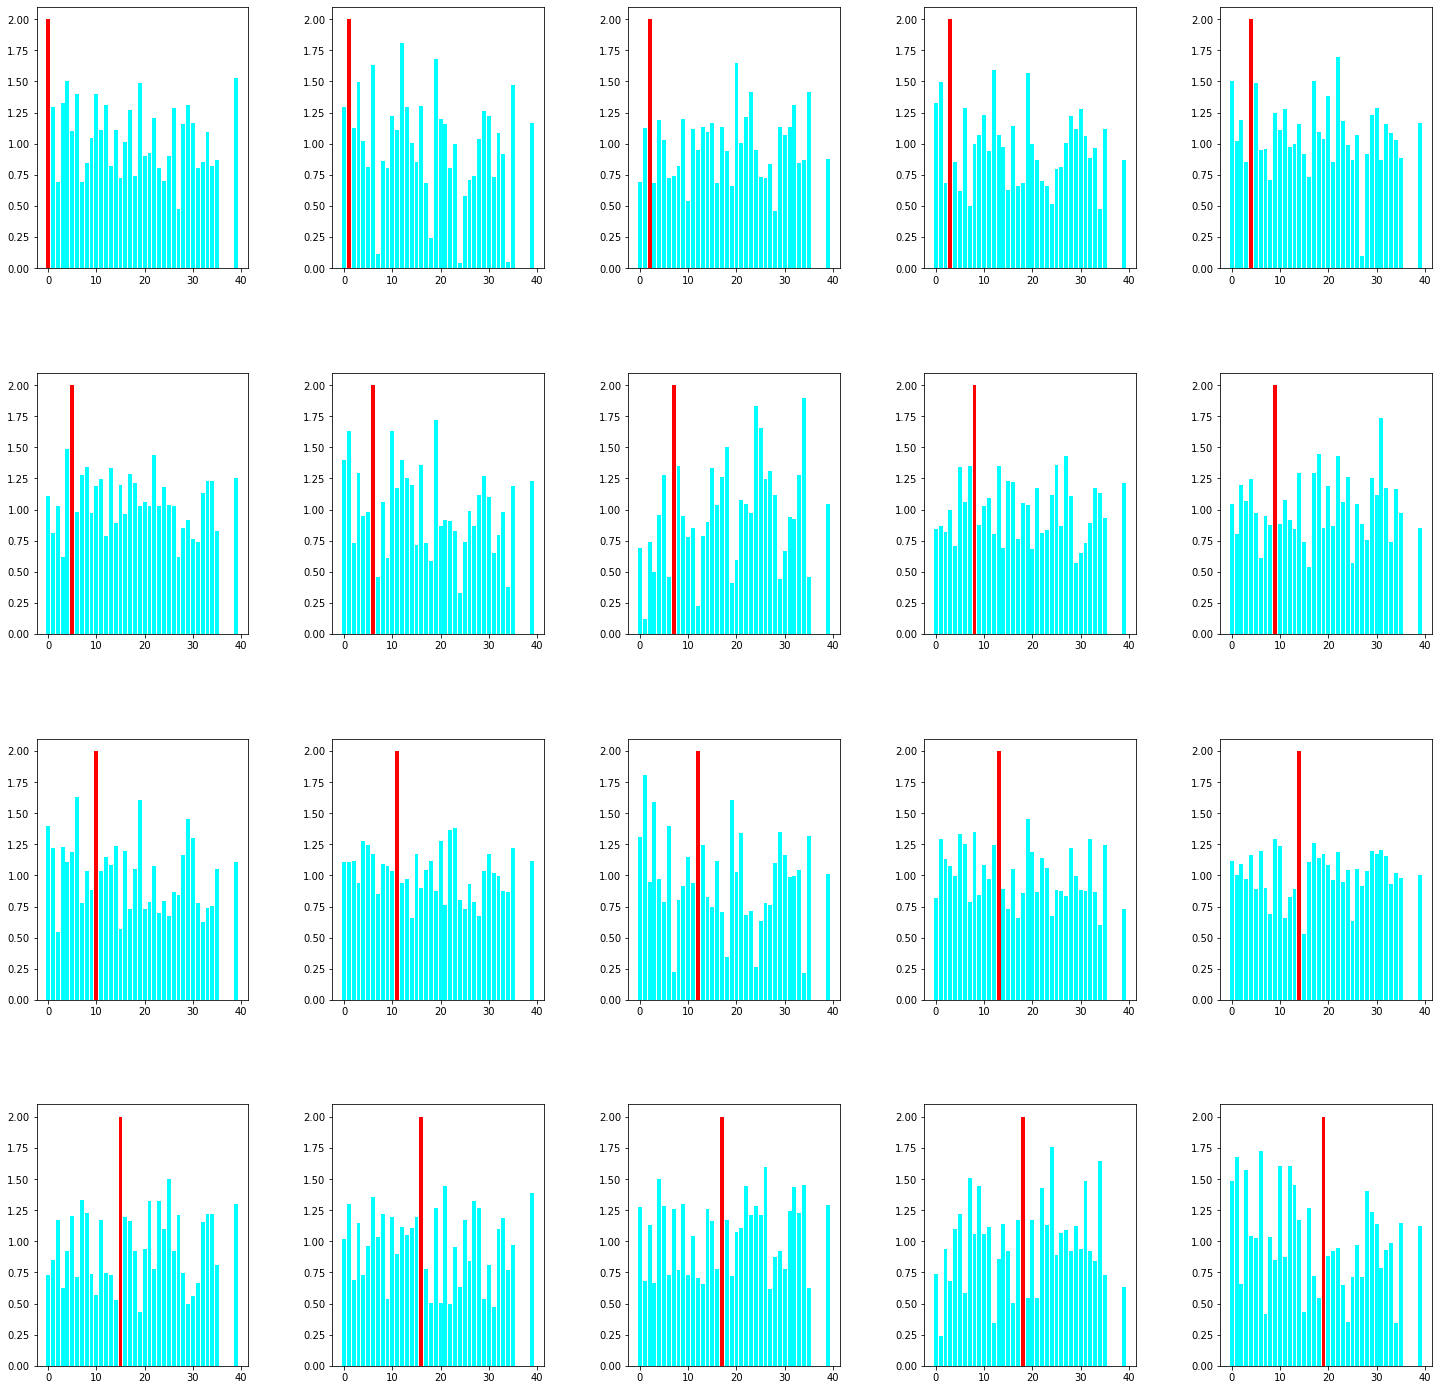

In [45]:
f, ax = plt.subplots(4,5)
f.set_size_inches((5*5, 5*5))
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
for x in range(4):
    for y in range(5):
        anchor = x*5+y
        graph = []
        for i in range(bins):
            graph.append(cos_sim(alpha_result[anchor], alpha_result[i])+1)
        b = np.arange(bins)
        c = np.where(b == anchor, 'r', 'aqua')
        ax[x,y].bar(range(bins), graph, color=c)
plt.show()
# TODO 각 라벨별 개수 세기

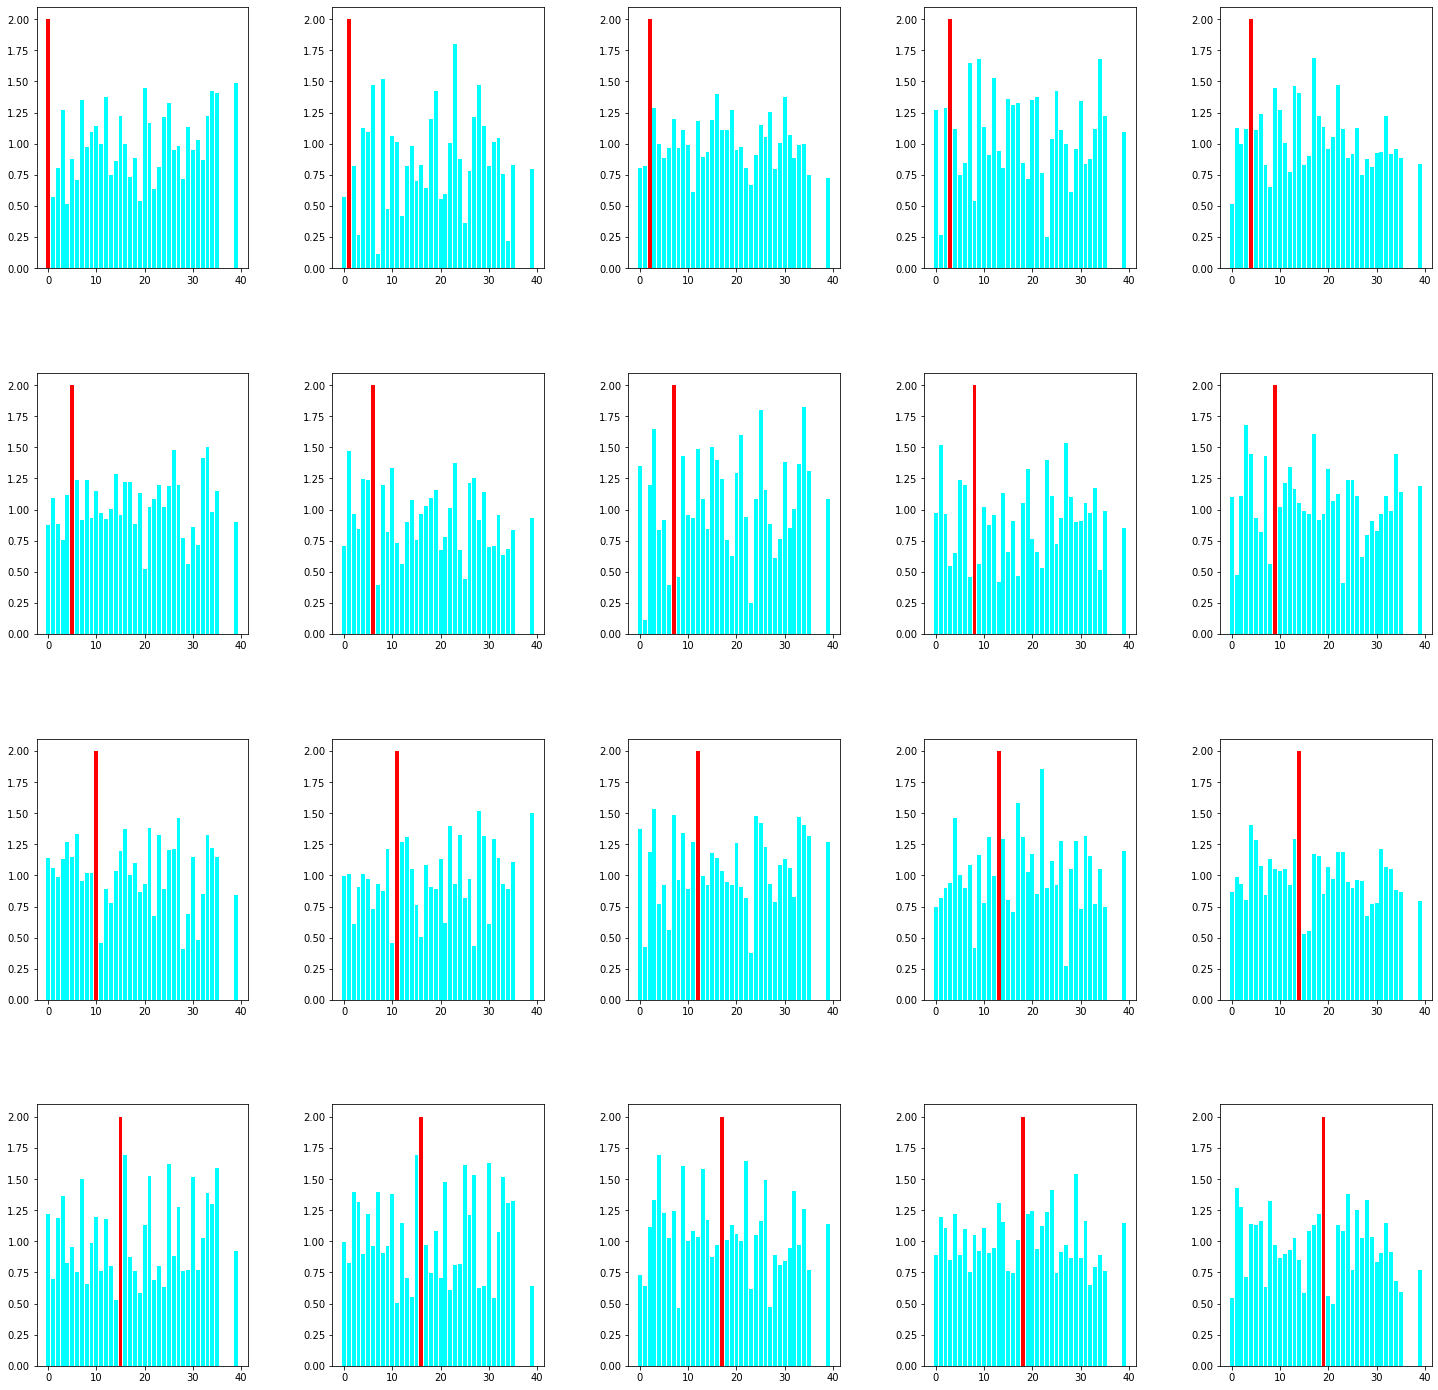

In [43]:
f, ax = plt.subplots(4,5)
f.set_size_inches((5*5, 5*5))
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
for x in range(4):
    for y in range(5):
        anchor = x*5+y
        graph = []
        for i in range(bins):
            graph.append(cos_sim(beta_result[anchor], beta_result[i])+1)
        b = np.arange(bins)
        c = np.where(b == anchor, 'r', 'aqua')
        ax[x,y].bar(range(bins), graph, color=c)
plt.show()
# TODO 각 라벨별 개수 세기

---

### val, aro 나누기

In [14]:
eeg_data = data[:][:32][:]
eeg_data.shape

(32, 40, 8064)

In [6]:
for x in range(0, 10, 1):
    start, end = x, x+1
    tmp_val = (val > start) & (val <= end)
    tmp_aro = (aro > start) & (aro <= end)
    val[tmp_val] = end
    aro[tmp_aro] = end
print(np.unique(val, return_counts = True))
print(np.unique(aro, return_counts = True))

(array([1., 2., 3., 4., 5., 6., 7., 8., 9.]), array([ 46,  67, 109, 145, 205, 169, 178, 220, 141], dtype=int64))
(array([1., 2., 3., 4., 5., 6., 7., 8., 9.]), array([ 50,  60, 116, 150, 167, 213, 231, 196,  97], dtype=int64))


### 데이터 스케일링

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data_scaled = ss.fit_transform(mat_data)

In [8]:
data_scaled.shape

(1280, 322560)

### target = val

In [11]:
from sklearn.model_selection import train_test_split

train_input_val, test_input_val, train_target_val, test_target_val\
= train_test_split(data_scaled, val, stratify = val, random_state=42)

In [12]:
print(train_input_val.shape, test_target_val.shape)

(960, 322560) (320,)


### PCA

In [13]:
from sklearn.decomposition import PCA

pca_val = PCA(n_components=0.9)
pca_val.fit(train_input_val)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
print(pca_val.components_.shape)

(428, 322560)


In [15]:
train_input_pca_val = pca_val.transform(train_input_val)
test_input_pca_val = pca_val.transform(test_input_val)
print(train_input_pca_val.shape)
print(test_input_pca_val.shape)

(960, 428)
(320, 428)


In [30]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# lr_val = LogisticRegression(max_iter=10000, random_state=42)
# params = {'C': np.arange() }

# gs = GridSearchCV(lr_val, params, scoring='accuracy', n_jobs=-1)
# gs.fit(train_input_pca_val, train_target_val)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0.2 , 0.25, 0.3 , 0.35])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

### 로지스틱 회귀

In [20]:
from sklearn.linear_model import LogisticRegression

lr_val = LogisticRegression(max_iter=10000, random_state=42, C=0.001) # 0.8354 0.1718
# lr_val = LogisticRegression(max_iter=10000, random_state=42, C=0.0005) # 0.7687 0.1625
# lr_val = LogisticRegression(max_iter=10000, random_state=42, C=0.005) # 0.9583 0.15625
lr_val.fit(train_input_pca_val, train_target_val)
print(lr_val.score(train_input_pca_val, train_target_val))
print(lr_val.score(test_input_pca_val, test_target_val))

0.8354166666666667
0.171875


In [28]:
lr_val.predict(test_input_pca_val)

array([6., 6., 7., 7., 5., 8., 5., 8., 5., 5., 6., 6., 9., 5., 7., 5., 5.,
       5., 4., 9., 8., 1., 5., 6., 8., 6., 7., 8., 8., 8., 5., 7., 8., 4.,
       8., 5., 8., 5., 4., 5., 7., 8., 5., 8., 7., 8., 5., 5., 6., 6., 5.,
       3., 7., 8., 4., 4., 8., 5., 7., 6., 4., 8., 8., 5., 8., 8., 5., 8.,
       6., 8., 4., 5., 5., 5., 9., 5., 5., 4., 8., 8., 5., 8., 5., 8., 9.,
       8., 4., 7., 6., 5., 2., 9., 5., 8., 8., 8., 5., 7., 5., 5., 6., 8.,
       5., 8., 8., 5., 8., 8., 5., 7., 4., 7., 5., 6., 3., 5., 8., 4., 8.,
       8., 6., 8., 6., 5., 8., 5., 7., 8., 7., 5., 7., 5., 6., 4., 7., 8.,
       7., 5., 6., 8., 7., 5., 3., 8., 8., 8., 7., 5., 5., 8., 8., 4., 4.,
       8., 6., 6., 6., 5., 8., 8., 8., 8., 5., 8., 4., 9., 9., 6., 5., 6.,
       4., 7., 8., 8., 5., 5., 8., 6., 6., 5., 6., 8., 3., 4., 7., 3., 6.,
       5., 7., 4., 5., 5., 6., 8., 6., 8., 3., 7., 5., 5., 5., 8., 5., 8.,
       5., 9., 6., 8., 5., 8., 8., 2., 8., 8., 5., 7., 5., 8., 5., 7., 6.,
       8., 5., 8., 7., 5.

In [29]:
test_target_val

array([5., 7., 3., 2., 7., 9., 5., 7., 5., 4., 7., 3., 4., 6., 6., 2., 7.,
       8., 4., 9., 8., 8., 8., 5., 4., 7., 5., 5., 9., 9., 5., 2., 3., 4.,
       8., 5., 2., 8., 3., 9., 6., 9., 4., 8., 8., 8., 4., 8., 3., 3., 7.,
       4., 3., 5., 2., 7., 9., 1., 8., 3., 5., 8., 5., 6., 6., 7., 6., 5.,
       6., 9., 4., 6., 8., 7., 4., 7., 7., 6., 7., 8., 6., 3., 2., 3., 6.,
       1., 7., 7., 6., 4., 2., 5., 2., 1., 5., 4., 6., 5., 3., 8., 8., 9.,
       5., 4., 6., 3., 5., 9., 5., 4., 7., 9., 6., 3., 5., 5., 6., 4., 6.,
       5., 2., 6., 9., 7., 2., 7., 5., 5., 7., 6., 8., 4., 5., 5., 6., 7.,
       5., 8., 8., 6., 5., 7., 6., 5., 3., 3., 6., 2., 1., 2., 8., 4., 6.,
       8., 9., 8., 2., 1., 4., 6., 5., 9., 7., 8., 4., 8., 8., 8., 5., 9.,
       8., 9., 6., 7., 6., 1., 7., 9., 7., 8., 4., 8., 8., 5., 4., 5., 6.,
       8., 5., 3., 2., 9., 3., 8., 4., 8., 7., 8., 4., 9., 7., 8., 5., 5.,
       5., 4., 2., 8., 7., 8., 8., 5., 7., 6., 1., 6., 7., 5., 6., 7., 5.,
       9., 3., 3., 3., 7.

### 혼동행렬

In [77]:
from sklearn.metrics import confusion_matrix

val_true = test_target_val
val_pred = lr_val.predict(test_input_pca_val)
target_names = [np.arange(1,10,1)]
cm_val = confusion_matrix(val_true, val_pred)
val_acc = cm_val.diagonal()/cm_val.sum(axis=1)
print(val_acc*100)

[ 0.          5.88235294  0.         22.22222222 25.49019608  9.52380952
  8.88888889 41.81818182  5.71428571]


In [59]:
sum(cm.diagonal()/cm.sum(axis=1))

1.19539937186996

In [56]:
cm.diagonal()

array([ 0,  1,  0,  8, 13,  4,  4, 23,  2], dtype=int64)

In [55]:
cm.sum(axis=1)

array([12, 17, 27, 36, 51, 42, 45, 55, 35], dtype=int64)

In [49]:
print(cm)

[[ 0  0  0  0  7  0  1  4  0]
 [ 0  1  0  1  5  4  2  4  0]
 [ 0  0  0  2  8  6  3  8  0]
 [ 0  0  1  8 10  5  3  4  5]
 [ 0  1  2  3 13  5  9 17  1]
 [ 1  0  2  2 11  4  7 14  1]
 [ 0  0  1  3 18  6  4 12  1]
 [ 2  0  2  3 11  6  6 23  2]
 [ 0  0  0  2  5  5  7 14  2]]


In [54]:
from sklearn.metrics import classification_report

target_names = [str(i) for i in range(1,10)]
print(classification_report(val_true, val_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        12
           2     0.5000    0.0588    0.1053        17
           3     0.0000    0.0000    0.0000        27
           4     0.3333    0.2222    0.2667        36
           5     0.1477    0.2549    0.1871        51
           6     0.0976    0.0952    0.0964        42
           7     0.0952    0.0889    0.0920        45
           8     0.2300    0.4182    0.2968        55
           9     0.1667    0.0571    0.0851        35

    accuracy                         0.1719       320
   macro avg     0.1745    0.1328    0.1255       320
weighted avg     0.1716    0.1719    0.1513       320



### target = aro

In [52]:
from sklearn.model_selection import train_test_split

train_input_aro, test_input_aro, train_target_aro, test_target_aro\
= train_test_split(data_scaled, aro, stratify = aro, random_state=42)
print(train_input_aro.shape, test_target_aro.shape)

(960, 322560) (320,)


In [53]:
from sklearn.decomposition import PCA

pca_aro = PCA(n_components=0.9)
pca_aro.fit(train_input_aro)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [54]:
print(pca_aro.components_.shape)

(426, 322560)


In [55]:
train_input_pca_aro = pca_aro.transform(train_input_aro)
test_input_pca_aro = pca_aro.transform(test_input_aro)
print(train_input_pca_aro.shape)
print(test_input_pca_aro.shape)

(960, 426)
(320, 426)


In [71]:
from sklearn.linear_model import LogisticRegression

# lr_aro = LogisticRegression(max_iter=10000, random_state=42) # C=1 #1.0 #0.1437
# lr_aro = LogisticRegression(max_iter=10000, random_state=42, C=0.001) # 0.83125 0.16875
# lr_aro = LogisticRegression(max_iter=10000, random_state=42, C=0.0005) # 0.7718 0.175
# lr_aro = LogisticRegression(max_iter=10000, random_state=42, C=0.00005) # 0.6479 0.1875
lr_aro = LogisticRegression(max_iter=10000, random_state=42, C=0.000005) # 0.55 0.19
# lr_aro = LogisticRegression(max_iter=10000, random_state=42, C=0.0000005) # 0.309 0.1875
 
lr_aro.fit(train_input_pca_aro, train_target_aro)
print(lr_aro.score(train_input_pca_aro, train_target_aro))
print(lr_aro.score(test_input_pca_aro, test_target_aro))

0.55
0.190625


In [81]:
from sklearn.metrics import confusion_matrix

aro_true = test_target_aro
aro_pred = lr_aro.predict(test_input_pca_aro)
target_names = [np.arange(1,10,1)]
cm_aro = confusion_matrix(aro_true, aro_pred)
aro_acc = cm_aro.diagonal()/cm_aro.sum(axis=1)
print(aro_acc*100)
print(sum(aro_acc))

[ 0.          0.          0.          0.          4.76190476 33.96226415
 51.72413793 22.44897959  0.        ]
1.1289728643571937


In [73]:
cm_aro

array([[ 0,  0,  0,  0,  0,  3,  5,  4,  0],
       [ 0,  0,  0,  1,  0,  5,  6,  3,  0],
       [ 0,  0,  0,  1,  0,  6, 17,  5,  0],
       [ 0,  0,  0,  0,  0, 14, 19,  5,  0],
       [ 0,  0,  0,  2,  2, 11, 21,  6,  0],
       [ 0,  0,  0,  0,  1, 18, 31,  3,  0],
       [ 0,  0,  0,  2,  0, 20, 30,  6,  0],
       [ 0,  1,  0,  1,  0, 10, 26, 11,  0],
       [ 0,  0,  0,  1,  1,  8, 10,  4,  0]], dtype=int64)

###### from sklearn.metrics import classification_report

target_names = [str(i) for i in range(1,10)]
print(classification_report(aro_true, aro_pred, target_names=target_names, digits=4))

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://stackoverflow.com/questions/39770376/scikit-learn-get-accuracy-scores-for-each-class

## Support Vector Machines

### linear 

In [17]:
svm_val = SVC(kernel='linear')
svm_val.fit(train_input_pca_val, train_target_val)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

1.0
0.159375


### arousal

In [57]:
from sklearn.svm import SVC

svm_aro = SVC(kernel='linear')
svm_aro.fit(train_input_pca_aro, train_target_aro)
print(svm_aro.score(train_input_pca_aro, train_target_aro))
print(svm_aro.score(test_input_pca_aro, test_target_aro))

1.0
0.121875


In [79]:
from sklearn.svm import SVC

# svm_aro = SVC(kernel='linear', C= 0.00001) # 0.5770 # 0.1875
svm_aro = SVC(kernel='linear', C= 0.00002) # 0.6187 # 0.2
# svm_aro = SVC(kernel='linear', C= 0.00003) # 0.6375 # 0.1875

svm_aro.fit(train_input_pca_aro, train_target_aro)
print(svm_aro.score(train_input_pca_aro, train_target_aro))
print(svm_aro.score(test_input_pca_aro, test_target_aro))

0.61875
0.2


In [80]:
from sklearn.metrics import classification_report

aro_true = test_target_aro
aro_pred = svm_aro.predict(test_input_pca_aro)
target_names = [str(i) for i in range(1,10)]
print(classification_report(aro_true, aro_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        12
           2     0.0000    0.0000    0.0000        15
           3     0.0000    0.0000    0.0000        29
           4     0.0000    0.0000    0.0000        38
           5     0.2500    0.0238    0.0435        42
           6     0.2018    0.4151    0.2716        53
           7     0.2041    0.5172    0.2927        58
           8     0.2683    0.2245    0.2444        49
           9     0.0000    0.0000    0.0000        24

    accuracy                         0.2000       320
   macro avg     0.1027    0.1312    0.0947       320
weighted avg     0.1443    0.2000    0.1412       320



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
from sklearn.metrics import confusion_matrix

aro_true = test_target_aro
aro_pred = svm_aro.predict(test_input_pca_aro)
target_names = [np.arange(1,10,1)]
cm_aro = confusion_matrix(aro_true, aro_pred)
aro_acc = cm_aro.diagonal()/cm_aro.sum(axis=1)
print(aro_acc)

[0.         0.         0.         0.         0.02380952 0.41509434
 0.51724138 0.2244898  0.        ]


In [83]:
for true, pred in zip(aro_true, aro_pred):
    print(true,pred)

3.0 7.0
9.0 7.0
4.0 8.0
2.0 8.0
4.0 6.0
7.0 7.0
8.0 8.0
4.0 6.0
6.0 7.0
7.0 6.0
7.0 7.0
7.0 7.0
3.0 4.0
5.0 7.0
5.0 6.0
5.0 7.0
7.0 7.0
3.0 4.0
6.0 6.0
7.0 7.0
8.0 8.0
6.0 7.0
3.0 6.0
5.0 8.0
5.0 4.0
3.0 7.0
6.0 7.0
7.0 4.0
4.0 7.0
4.0 7.0
7.0 7.0
8.0 8.0
9.0 6.0
6.0 6.0
7.0 7.0
9.0 6.0
2.0 4.0
8.0 6.0
7.0 8.0
2.0 7.0
8.0 7.0
2.0 7.0
1.0 8.0
4.0 6.0
4.0 6.0
6.0 5.0
9.0 6.0
8.0 7.0
4.0 6.0
8.0 7.0
6.0 7.0
3.0 7.0
8.0 8.0
1.0 6.0
4.0 7.0
1.0 8.0
5.0 5.0
8.0 6.0
3.0 8.0
7.0 6.0
7.0 7.0
4.0 8.0
4.0 8.0
7.0 8.0
9.0 7.0
3.0 6.0
8.0 7.0
5.0 8.0
3.0 7.0
6.0 6.0
2.0 7.0
5.0 6.0
5.0 7.0
4.0 7.0
8.0 7.0
5.0 6.0
6.0 7.0
8.0 8.0
6.0 6.0
3.0 7.0
3.0 7.0
2.0 6.0
6.0 8.0
4.0 6.0
3.0 7.0
9.0 7.0
6.0 6.0
4.0 8.0
6.0 7.0
2.0 6.0
7.0 6.0
7.0 6.0
7.0 7.0
6.0 8.0
5.0 7.0
4.0 7.0
6.0 6.0
7.0 7.0
7.0 7.0
9.0 7.0
5.0 7.0
5.0 4.0
5.0 8.0
8.0 6.0
6.0 7.0
4.0 6.0
8.0 7.0
8.0 7.0
9.0 4.0
9.0 7.0
5.0 6.0
6.0 6.0
3.0 7.0
8.0 8.0
7.0 7.0
2.0 8.0
3.0 7.0
5.0 7.0
5.0 8.0
1.0 6.0
5.0 4.0
7.0 6.0
9.0 6.0
6.0 4.0
8.0 7.0


In [39]:
from sklearn.svm import SVC


svm_val = SVC(kernel='linear', C=0.000008) 
svm_val.fit(train_input_pca_val, train_target_val)
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.5489583333333333
0.196875


In [42]:
svm_val = SVC(kernel='linear', C=0.000005) 
svm_val.fit(train_input_pca_val, train_target_val)
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.490625
0.2


In [24]:
10**(-5)*5

5e-05

In [25]:
10**(-6)

1e-06

In [ ]:
0.00005 10
0.000005

In [31]:
np.arange(0.0000001,0.00001,0.0000001)

array([1.0e-07, 2.0e-07, 3.0e-07, 4.0e-07, 5.0e-07, 6.0e-07, 7.0e-07,
       8.0e-07, 9.0e-07, 1.0e-06, 1.1e-06, 1.2e-06, 1.3e-06, 1.4e-06,
       1.5e-06, 1.6e-06, 1.7e-06, 1.8e-06, 1.9e-06, 2.0e-06, 2.1e-06,
       2.2e-06, 2.3e-06, 2.4e-06, 2.5e-06, 2.6e-06, 2.7e-06, 2.8e-06,
       2.9e-06, 3.0e-06, 3.1e-06, 3.2e-06, 3.3e-06, 3.4e-06, 3.5e-06,
       3.6e-06, 3.7e-06, 3.8e-06, 3.9e-06, 4.0e-06, 4.1e-06, 4.2e-06,
       4.3e-06, 4.4e-06, 4.5e-06, 4.6e-06, 4.7e-06, 4.8e-06, 4.9e-06,
       5.0e-06, 5.1e-06, 5.2e-06, 5.3e-06, 5.4e-06, 5.5e-06, 5.6e-06,
       5.7e-06, 5.8e-06, 5.9e-06, 6.0e-06, 6.1e-06, 6.2e-06, 6.3e-06,
       6.4e-06, 6.5e-06, 6.6e-06, 6.7e-06, 6.8e-06, 6.9e-06, 7.0e-06,
       7.1e-06, 7.2e-06, 7.3e-06, 7.4e-06, 7.5e-06, 7.6e-06, 7.7e-06,
       7.8e-06, 7.9e-06, 8.0e-06, 8.1e-06, 8.2e-06, 8.3e-06, 8.4e-06,
       8.5e-06, 8.6e-06, 8.7e-06, 8.8e-06, 8.9e-06, 9.0e-06, 9.1e-06,
       9.2e-06, 9.3e-06, 9.4e-06, 9.5e-06, 9.6e-06, 9.7e-06, 9.8e-06,
       9.9e-06])

In [36]:
print(gs.best_params_)
print(gs.best_score_)

{'C': 8e-06}
0.19791666666666669


In [37]:
svm_val = gs.best_estimator_
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.5489583333333333
0.196875


In [32]:
len(np.arange(0.0000001,0.00001,0.0000001))

99

In [33]:
from sklearn.model_selection import GridSearchCV

svm_val = SVC(kernel='linear') 
params = {'C': np.arange(0.0000001,0.00001,0.0000001) }

gs = GridSearchCV(svm_val, params, scoring='accuracy', n_jobs=-1)
gs.fit(train_input_pca_val, train_target_val)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.0e-07, 2.0e-07, 3.0e-07, 4....
       6.4e-06, 6.5e-06, 6.6e-06, 6.7e-06, 6.8e-06, 6.9e-06, 7.0e-06,
       7.1e-06, 7.2e-06, 7.3e-06, 7.4e-06, 7.5e-06, 7.6e-06, 7.7e-06,
       7.8e-06, 7.9e-06, 8.0e-06, 8.1e-06, 8.2e-06, 8.3e-06, 8.4e-06,
       8.5e-06, 8.6e-06, 8.7e-06, 8.8e-06, 8.9e-06, 9.0e-06, 9.1e-06,
       9.2e-06, 9.3e-06, 9.4e-06, 9.5e-06, 9.6e-06, 9.7e-06, 9.8e-06,
       9.9e-06])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
    

In [123]:
from sklearn.svm import SVC
# pca 830개
svm_val = SVC(kernel='linear', C=0.000005) # 0.5 0.2
svm_val.fit(train_input_pca_val, train_target_val)
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.6177083333333333
0.196875


In [129]:
from sklearn.svm import SVC
# pca 830개
svm_val = SVC(kernel='linear', C=0.00001)
svm_val.fit(train_input_pca_val, train_target_val)
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.828125
0.203125


In [99]:
# svm_aro = SVC(kernel='linear') # 1.0 0.1218
# svm_aro = SVC(kernel='linear', C=0.0001) # 0.70 0.18
svm_aro = SVC(kernel='linear', C=0.000005) # 0.5 0.17 
svm_aro.fit(train_input_pca_aro, train_target_aro)
print(svm_aro.score(train_input_pca_aro, train_target_aro))
print(svm_aro.score(test_input_pca_aro, test_target_aro))

0.5125
0.171875


### rbf

In [106]:
svm_val = SVC(kernel='rbf')
svm_val.fit(train_input_pca_val, train_target_val)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [107]:
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.5145833333333333
0.190625


In [102]:
svm_val = SVC(kernel='sigmoid')
svm_val.fit(train_input_pca_val, train_target_val)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [103]:
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.3375
0.184375


In [104]:
svm_val = SVC(kernel='poly')
svm_val.fit(train_input_pca_val, train_target_val)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [105]:
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.415625
0.16875


## PCA 적당히

In [110]:
train_input_val.shape

(960, 322560)

In [111]:
from sklearn.decomposition import PCA

pca_val = PCA(n_components=0.99)
pca_val.fit(train_input_val)
print(pca_val.components_.shape)

(830, 322560)


In [112]:
train_input_pca_val = pca_val.transform(train_input_val)
test_input_pca_val = pca_val.transform(test_input_val)
print(train_input_pca_val.shape)
print(test_input_pca_val.shape)

(960, 830)
(320, 830)


In [122]:
svm_val = SVC(kernel='rbf', C=1)
svm_val.fit(train_input_pca_val, train_target_val)
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.5677083333333334
0.18125


In [118]:
svm_val = SVC(kernel='rbf', C=2)
svm_val.fit(train_input_pca_val, train_target_val)
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.8364583333333333
0.171875


In [44]:
from sklearn.metrics import classification_report

val_true = test_target_val
val_pred = svm_val.predict(test_input_pca_val)
target_names = [str(i) for i in range(1,10)]
print(classification_report(val_true, val_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        12
           2     0.0000    0.0000    0.0000        17
           3     0.0000    0.0000    0.0000        27
           4     0.5000    0.0278    0.0526        36
           5     0.1983    0.4510    0.2754        51
           6     0.0000    0.0000    0.0000        42
           7     0.0000    0.0000    0.0000        45
           8     0.2031    0.7091    0.3158        55
           9     1.0000    0.0286    0.0556        35

    accuracy                         0.2000       320
   macro avg     0.2113    0.1352    0.0777       320
weighted avg     0.2321    0.2000    0.1102       320



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
from sklearn.metrics import confusion_matrix

val_true = test_target_val
val_pred = svm_val.predict(test_input_pca_val)
target_names = [np.arange(1,10,1)]
cm_val = confusion_matrix(val_true, val_pred)
val_acc = cm_val.diagonal()/cm_val.sum(axis=1)
print(val_acc)

[0.         0.         0.         0.02777778 0.45098039 0.
 0.         0.70909091 0.02857143]


In [51]:
for true, pred in zip(val_true, val_pred):
    print(true,pred)

5.0 8.0
7.0 8.0
3.0 8.0
2.0 8.0
7.0 5.0
9.0 8.0
5.0 8.0
7.0 8.0
5.0 5.0
4.0 8.0
7.0 8.0
3.0 5.0
4.0 8.0
6.0 5.0
6.0 8.0
2.0 5.0
7.0 5.0
8.0 5.0
4.0 4.0
9.0 8.0
8.0 8.0
8.0 5.0
8.0 8.0
5.0 8.0
4.0 8.0
7.0 8.0
5.0 8.0
5.0 8.0
9.0 8.0
9.0 8.0
5.0 5.0
2.0 8.0
3.0 8.0
4.0 8.0
8.0 8.0
5.0 5.0
2.0 5.0
8.0 5.0
3.0 5.0
9.0 5.0
6.0 7.0
9.0 8.0
4.0 5.0
8.0 8.0
8.0 8.0
8.0 8.0
4.0 5.0
8.0 8.0
3.0 8.0
3.0 8.0
7.0 5.0
4.0 5.0
3.0 5.0
5.0 8.0
2.0 5.0
7.0 5.0
9.0 8.0
1.0 8.0
8.0 8.0
3.0 8.0
5.0 8.0
8.0 8.0
5.0 8.0
6.0 5.0
6.0 8.0
7.0 8.0
6.0 5.0
5.0 8.0
6.0 8.0
9.0 5.0
4.0 5.0
6.0 8.0
8.0 8.0
7.0 5.0
4.0 8.0
7.0 8.0
7.0 8.0
6.0 8.0
7.0 8.0
8.0 8.0
6.0 5.0
3.0 8.0
2.0 5.0
3.0 8.0
6.0 8.0
1.0 8.0
7.0 8.0
7.0 8.0
6.0 8.0
4.0 5.0
2.0 6.0
5.0 7.0
2.0 5.0
1.0 8.0
5.0 5.0
4.0 8.0
6.0 8.0
5.0 8.0
3.0 5.0
8.0 5.0
8.0 8.0
9.0 5.0
5.0 5.0
4.0 8.0
6.0 8.0
3.0 5.0
5.0 7.0
9.0 8.0
5.0 8.0
4.0 8.0
7.0 4.0
9.0 8.0
6.0 8.0
3.0 8.0
5.0 5.0
5.0 5.0
6.0 8.0
4.0 5.0
6.0 8.0
5.0 8.0
2.0 5.0
6.0 5.0
9.0 8.0
7.0 8.0
2.0 8.0


In [50]:
len(val_pred)

320

In [46]:
print(sum(val_acc*100))

121.64205075969782


https://scikit-learn.org/stable/modules/svm.html#classification